In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import *
from os import chdir
from sklearn.metrics import confusion_matrix
plt.rcParams.update({'font.size': 17})

from os import listdir

In [2]:
model_list = listdir('models')

In [3]:
# loads .npy of model predictions and plots confusion matrix
def plot_predictions(name: str) -> None:
    predictions = np.load(f'models/{name}/predictions.npy')
    matrix = confusion_matrix(predictions[:,0], predictions[:,1], labels=[1, 0])
    graph = [matrix[0][0], matrix[1][1], matrix[1][0], matrix[0][1]]
    labels = ['True positives', 'True negatives', 'False positives', 'False negatives']
    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(15,10), facecolor='#ffffff')
    rects1 = ax.bar(x, graph)
    ax.set_ylabel('Count')
    ax.set_title(f'Prediction counts of model: {name}')
    ax.set_xticks(x, labels)
    ax.bar_label(rects1)
    fig.tight_layout()
    plt.show()
    fig.savefig(f'graphs/predictions/predictions_{name}.png')

In [4]:
# loads .csv of model training history and plots it
def plot_history(name: str) -> None:
    history = pd.read_csv(f'models/{name}/history.log')
    n_epochs = len(history['binary_accuracy'])
    fig = plt.figure(figsize=(15,10), facecolor='#ffffff')
    plt.plot(range(1, n_epochs + 1), history['binary_accuracy'], label='train binary_accuracy')
    plt.plot(range(1, n_epochs + 1), history['val_binary_accuracy'], label='validation binary_accuracy')
    plt.legend()
    plt.title(f'Training and validation binary_accuracy of model: {name}')
    plt.show()
    fig.savefig(f'graphs/history/history_{name}.png')

In [5]:
# loads .npy of model evaluation and plots it
def plot_compare_models(names: List[str], labels=None) -> None:
    if (labels == None): labels = list(map(lambda label: label.replace('_', '\n'), names))
    assert (len(names) == len(labels))
    evalualtions = [float(np.load(f'models/{name}/evaluation.npy')) for name in names]

    labels = [x for _, x in sorted(zip(evalualtions, labels), reverse=True)]
    evalualtions = sorted(evalualtions, reverse=True)

    y_min = min(evalualtions) - .01
    evalualtions = [e - y_min for e in evalualtions]
    x = np.arange(len(names))
    fig, ax = plt.subplots(figsize=(15,10), facecolor='#ffffff')
    rects1 = ax.bar(x, evalualtions, bottom=y_min)
    ax.set_ylabel('val_binary_accuracy')
    ax.set_title(f'val_binary_accuracy of models')
    ax.set_xticks(x, labels)
    ax.bar_label(rects1)
    fig.tight_layout()
    plt.show()
    fig.savefig('graphs/compare_models.png')

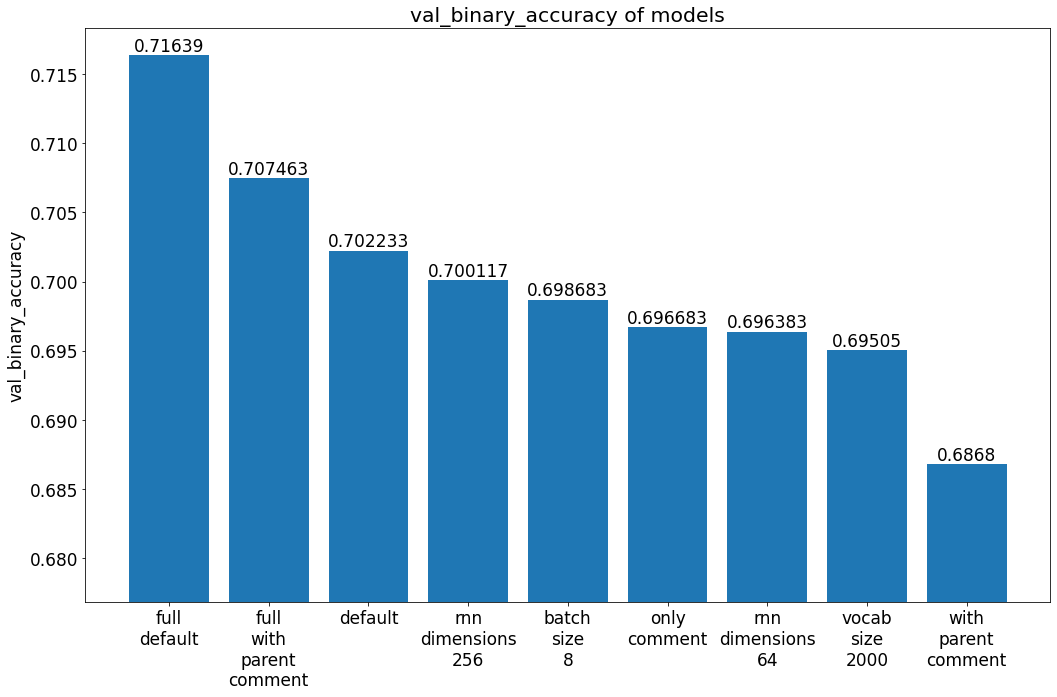

In [6]:
plot_compare_models(model_list)

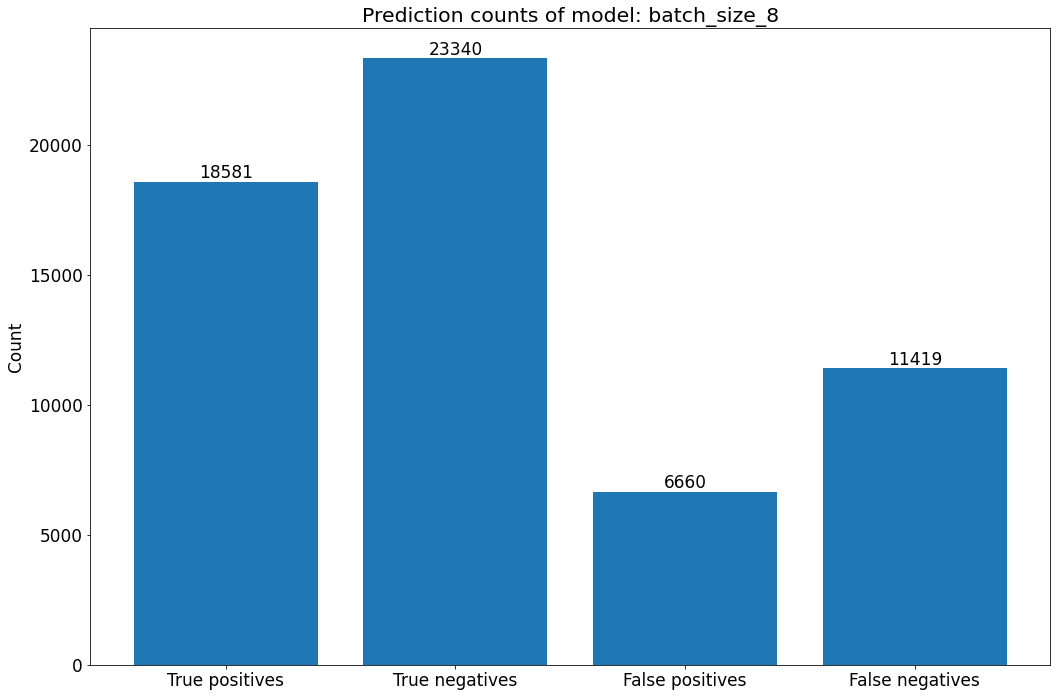

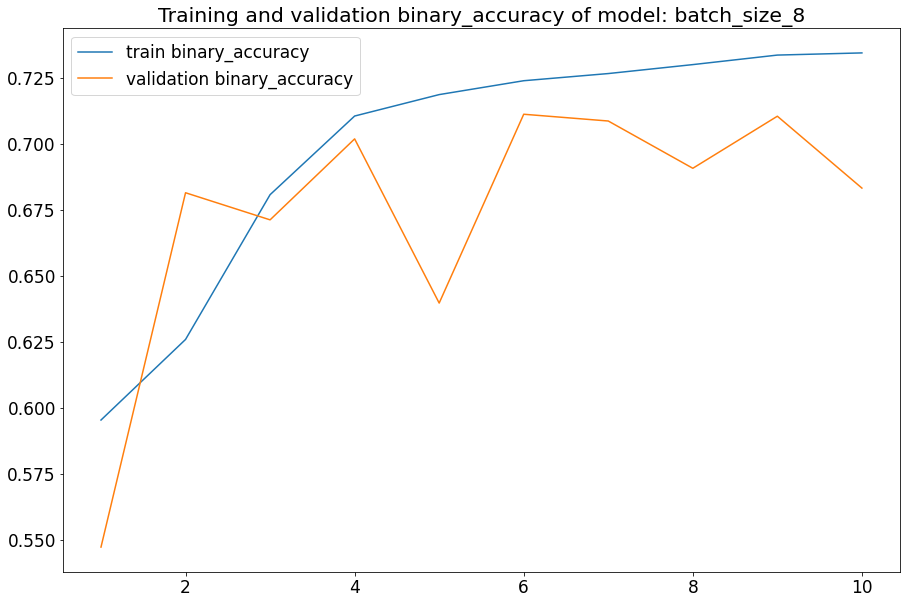

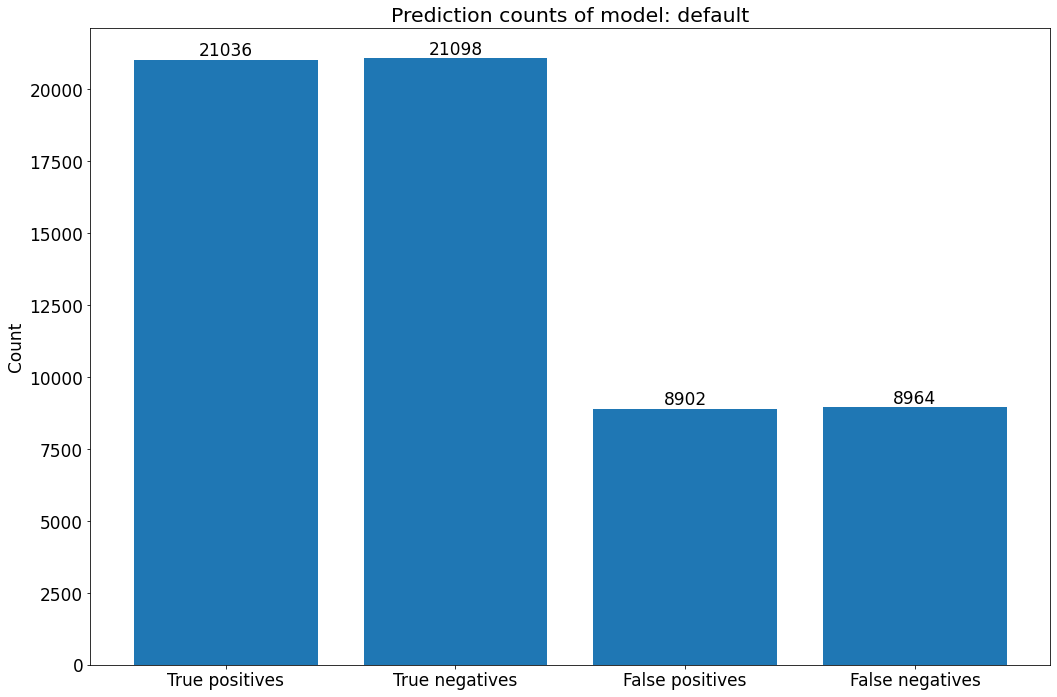

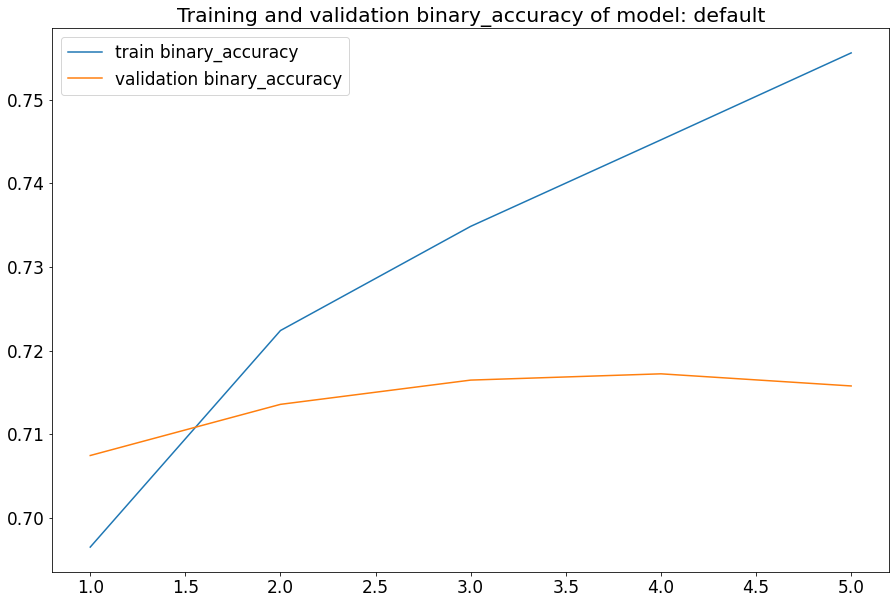

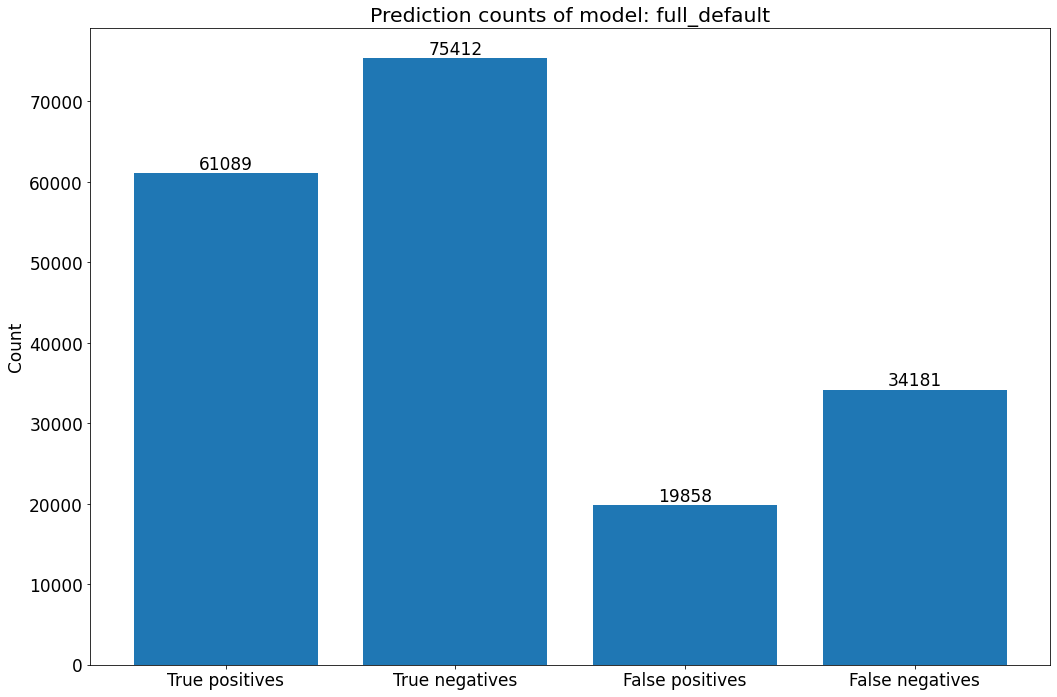

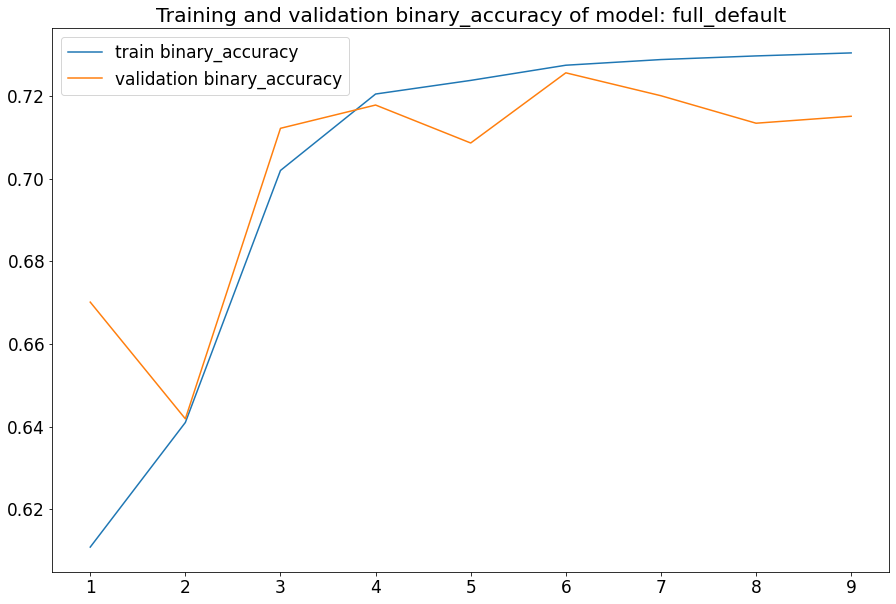

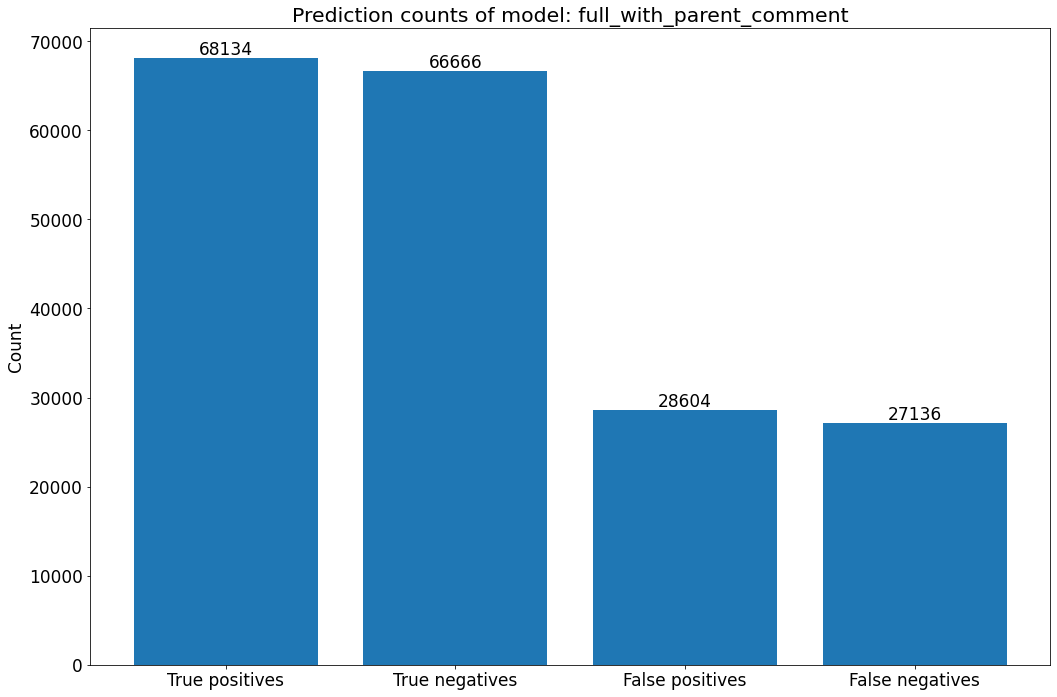

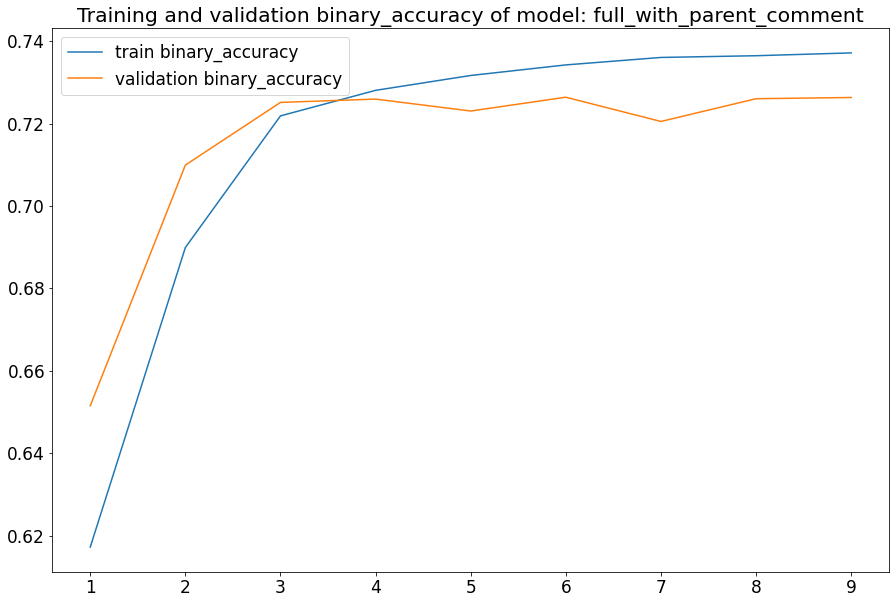

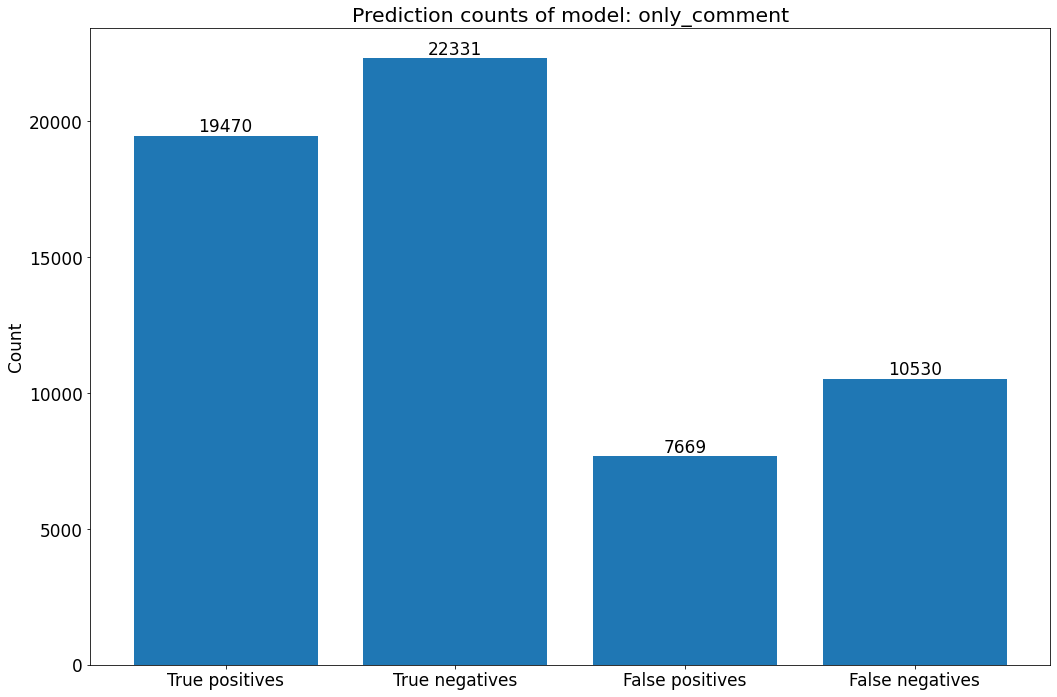

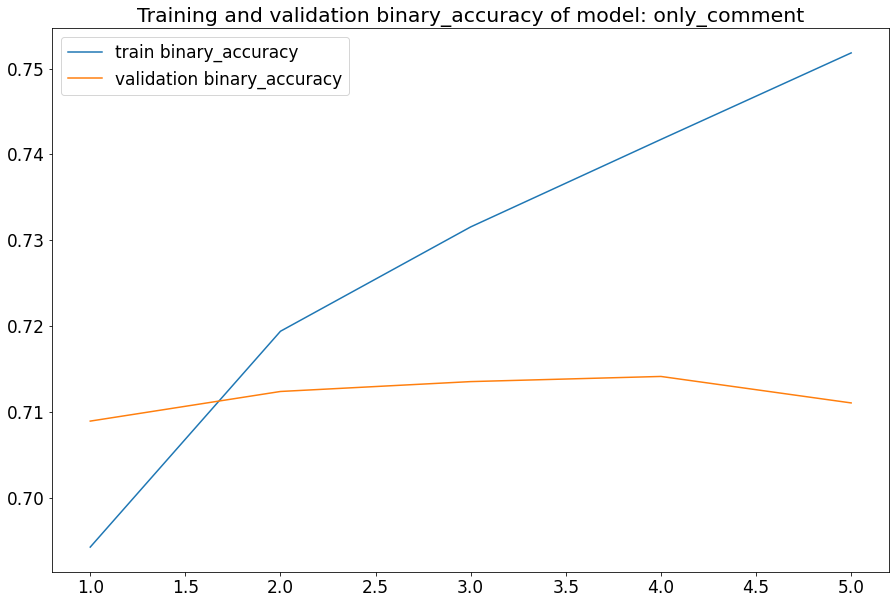

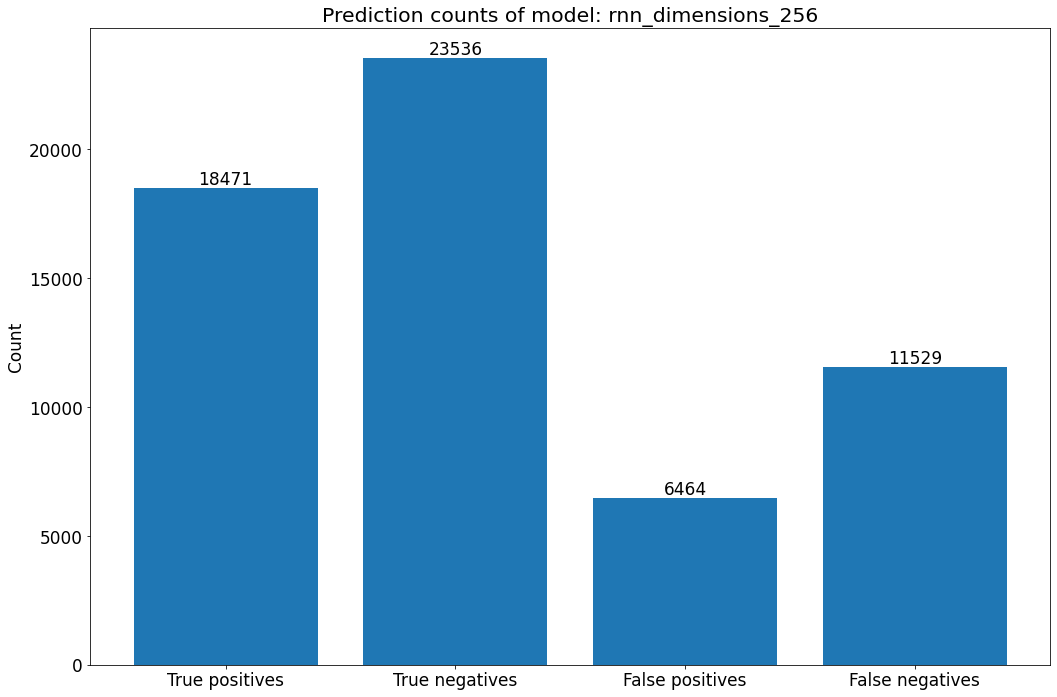

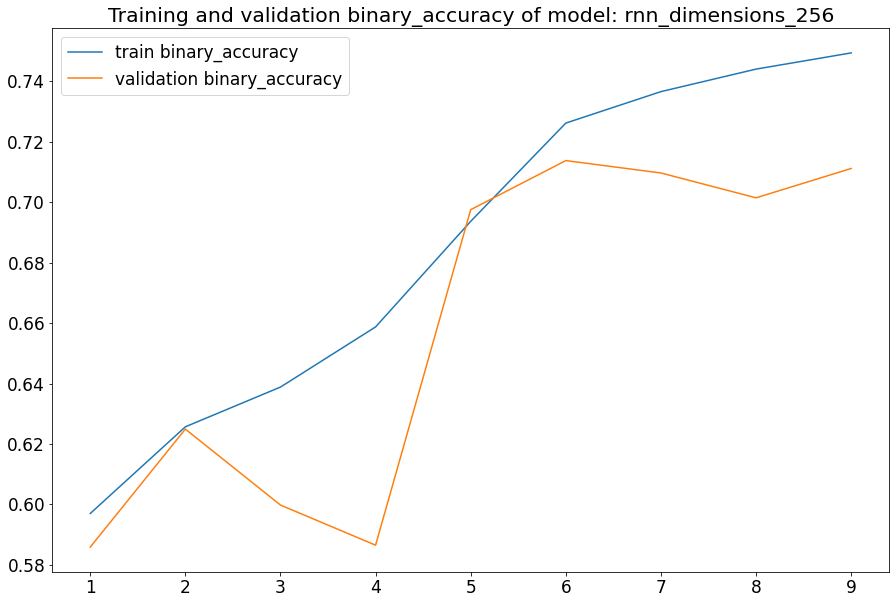

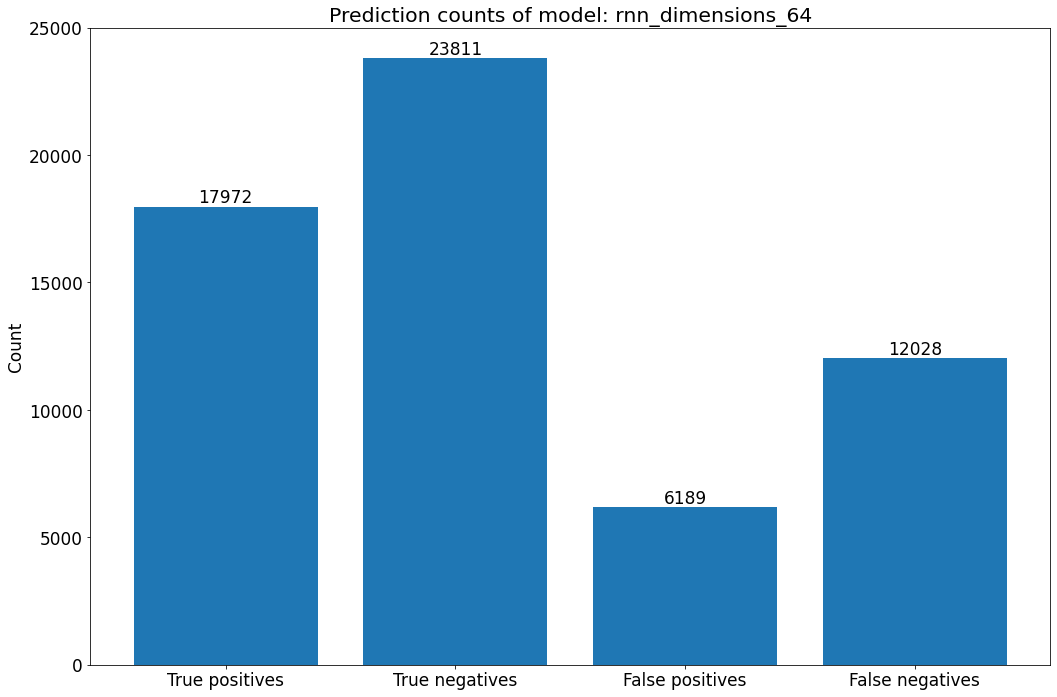

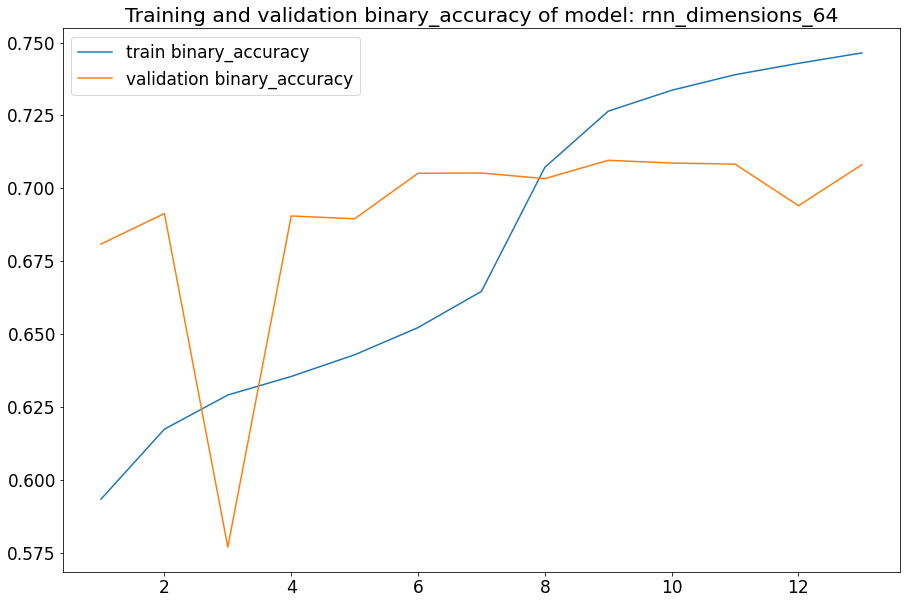

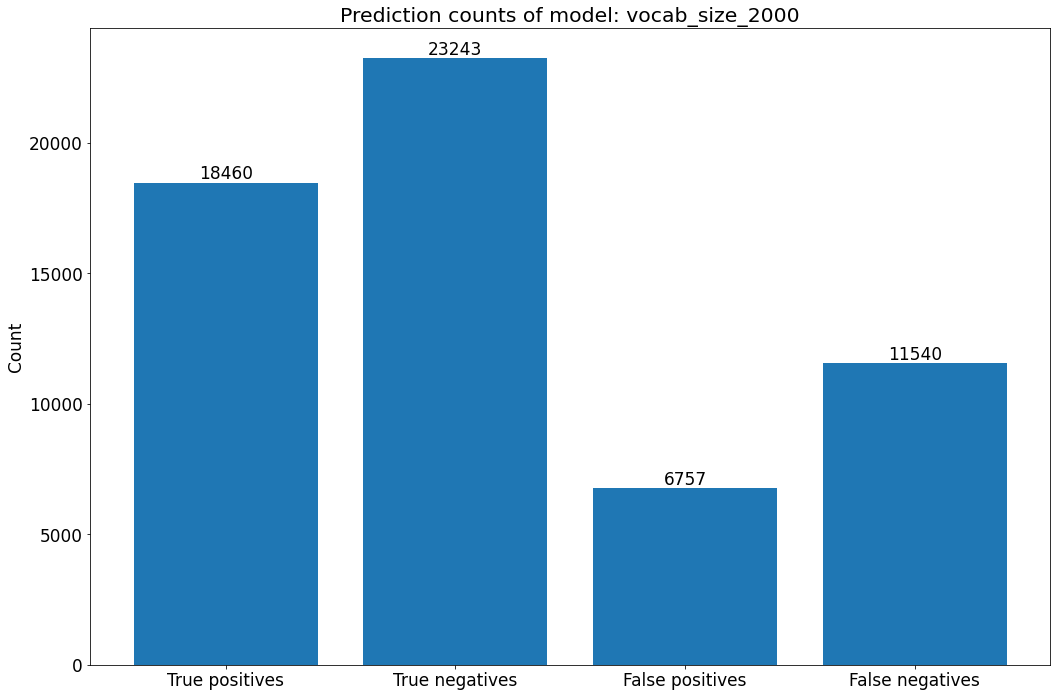

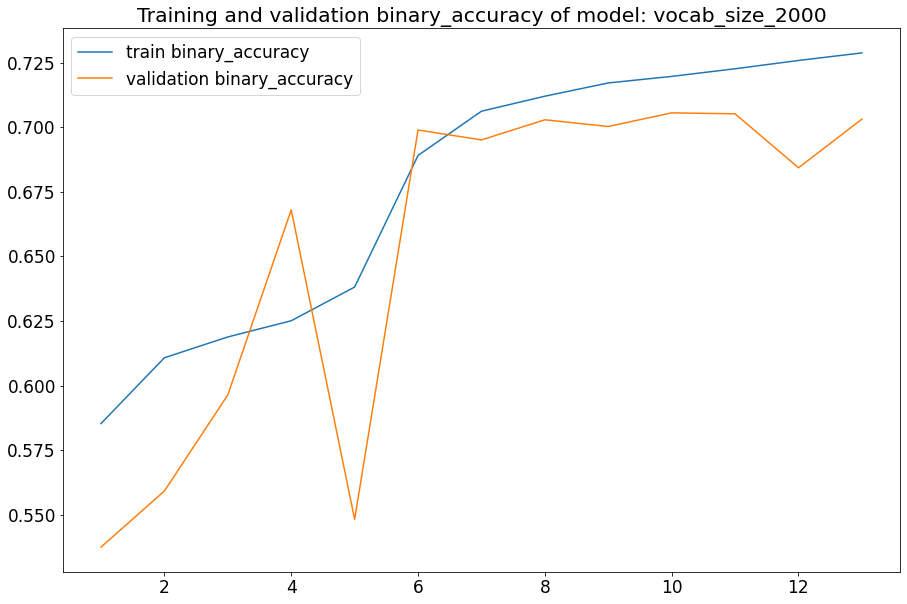

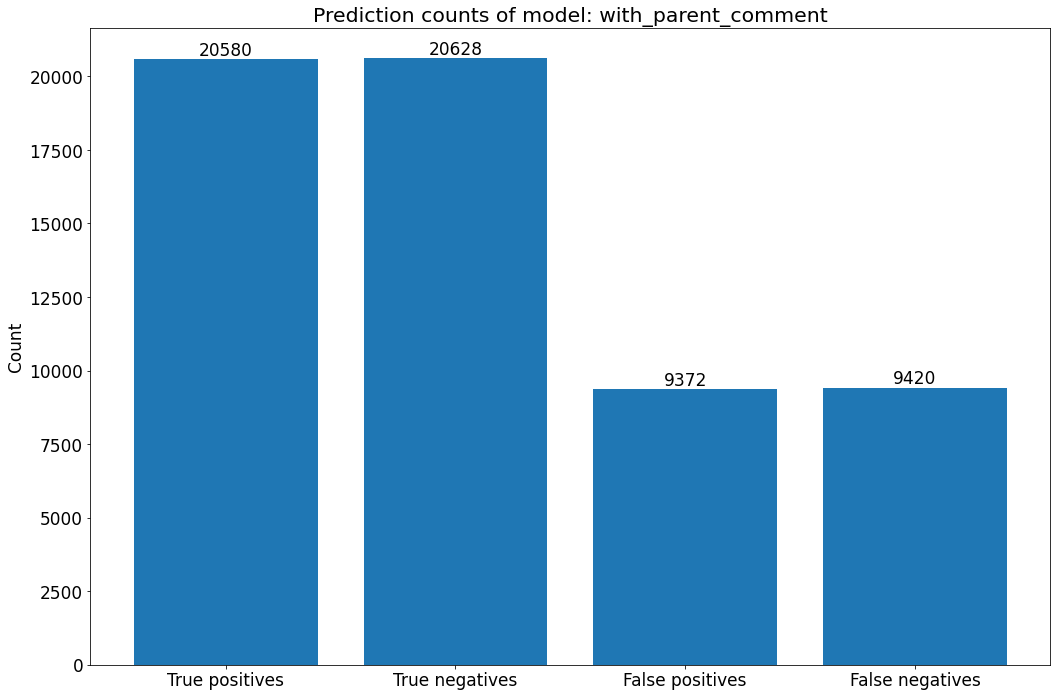

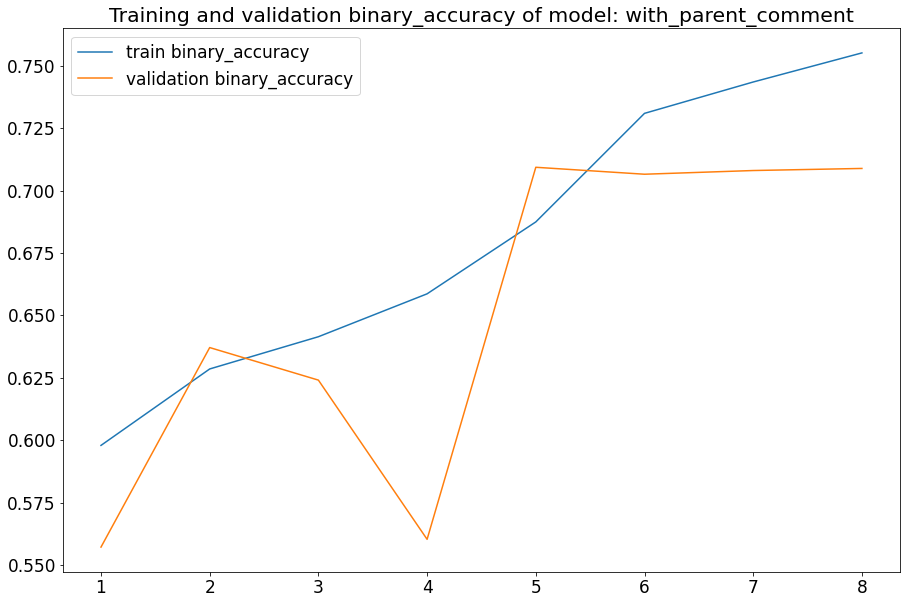

In [7]:
for model in model_list:
    plot_predictions(model)
    plot_history(model)